#TP 02

{dorian.magnin, noemien.kocher}@master.hes-so.ch

# Exercice 1 Get the data


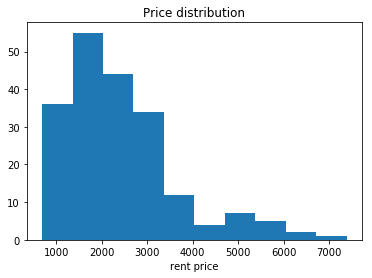

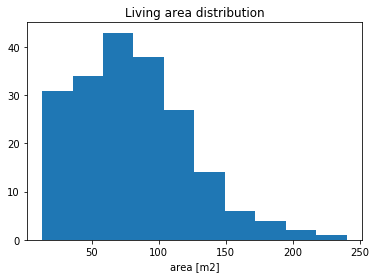

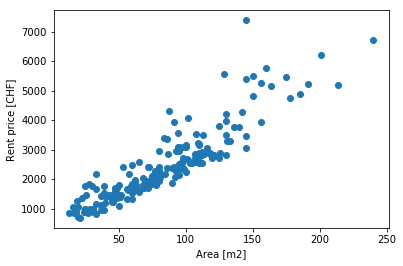

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_excel('lausanne-appart.xlsx',
                        parse_cols=2,
                        header=1,
                        names=['area', 'room', 'rent'])

plt.hist(dataset['rent'])
plt.title("Price distribution")
plt.xlabel('rent price')
plt.show()

plt.hist(dataset['area'])
plt.title("Living area distribution")
plt.xlabel('area [m2]')
plt.show()

plt.scatter(dataset['area'], dataset['rent'])
plt.xlabel('Area [m2]')
plt.ylabel('Rent price [CHF]')
plt.show()

# Exercice 2

Nous remarquons que *polyfit* donne le même résultat qu'avec le calcul matriciel, à ceci pret que les coefficient arrivent dans l'ordre inverse. La documentation de *polyfit* indique que les coefficient sont donné de l'ordre du plus grand au plus petit.

La fonction *poly1d* demande les coefficient par puissance dégressive. C'est pourquoi nous avons dû inverser notre tableau de coefficients.

Matrix method:  [ 241.99818246   26.32398249]


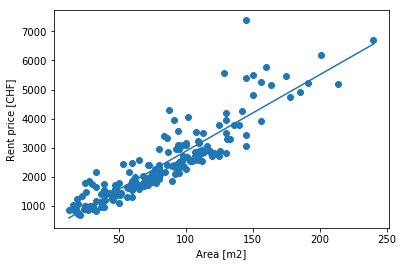

Polyfit method:  [  26.32398249  241.99818246]
Cost is:  138571.765683


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import inv

dataset = pd.read_excel('lausanne-appart.xlsx',
                        parse_cols=2,
                        header=1,
                        names=['area', 'room', 'rent'])

x = dataset['area']
y = dataset['rent']

X = np.matrix( [np.ones(len(x)), x] ).T

matrixCoeff = (inv(X.T*X)*X.T).dot(y)
print("Matrix method: ", matrixCoeff.A[0])
h = np.poly1d(matrixCoeff.A[0][::-1]) # Convert to ndarray, get first row, reverse it
xUnseen = np.linspace(np.min(x), np.max(x))
yHat = h(xUnseen)

plt.scatter(x, y)
plt.plot(xUnseen, yHat)
plt.xlabel('Area [m2]')
plt.ylabel('Rent price [CHF]')
plt.show()

# Prend un polynome de degré 1 et trouve les coef pour faire la droite
polynomCoef = np.polyfit(x, y, deg=1)
print("Polyfit method: ", polynomCoef)

# Compute overall cost
sum = 0
for i in range(0, len(x)):
    sum = sum + ( h(x[i]) - y[i] )**2
cost = sum / (2*len(x))
print("Cost is: ", cost)

# Exercice 3

teta0:  50.1989754314
teta1:  28.1801613843
Final cost:  138574.106665


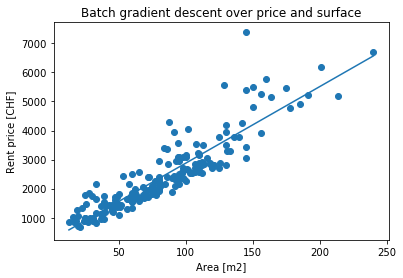

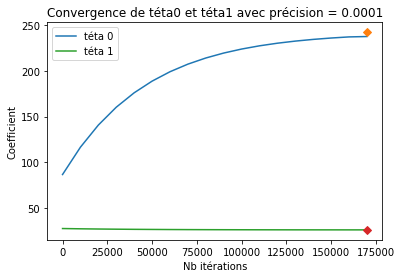

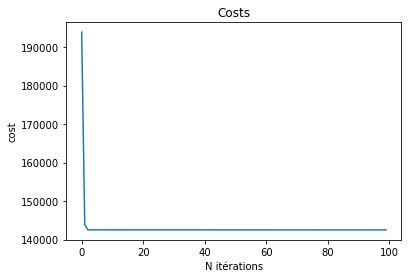

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import inv

dataset = pd.read_excel('lausanne-appart.xlsx',
                        parse_cols=2,
                        header=1,
                        names=['area', 'room', 'rent'])

x = dataset['area']
y = dataset['rent']

alpha = 0.000001

teta0 = 50.0
teta1 = 50.0

precision = 0.001 # 0.0001
printPass = 10000

def h(xn):
    return teta0 + teta1*xn


delta = 1000
old_result = teta0

iteri = 0
costs = []

#while delta > precision:
for _ in range(0, 100):
    iteri = iteri + 1
    sum0 = 0.0
    sum1 = 0.0
    for i in range(0, len(x)):
        sum = (h(x[i])-y[i])
        sum0 = sum0 + sum
        sum1 = sum1 + sum*x[i]
        
    teta0 = teta0 - sum0*(alpha/2)    
    teta1 = teta1 - sum1*(alpha/2)
    delta = np.abs(old_result - teta0)
    old_result = teta0
    printPass = printPass - 1
    if printPass <= 0:
        print("teta0: ", teta0)
        print("teta1: ", teta1)
        printPass = 10000
    
    # Compute overall cost
    sum = 0
    for i in range(0, len(x)):
        sum = sum + ( h(x[i]) - y[i] )**2
    cost = sum / (2*len(x))
    costs.append(cost)

print("teta0: ", teta0)
print("teta1: ", teta1)

# Courbe de convergence des teta0 et teta1, pour chaque 10'000 itérations (on voit l'évolution de téta0 et téta1 au fil des itérations)
# temps de calcul: ~30min. Nombre d'itérations total: 175'000
teta0s = [86.7547951322, 116.611387885, 140.725925236, 160.202726104,
         175.933725481, 188.639320363, 198.901360137, 207.189792225,
         213.884183203, 219.291100953, 223.658153855, 227.185329953,
         230.034155351, 232.335091264, 234.193508447, 235.694512628,
         236.906841902, 237.31646952]
teta1s = [27.8263844221, 27.5374406979, 27.3040669742, 27.1155759623, 
          26.9633357659, 26.840374585, 26.7410614445, 26.6608483253,
          26.5960618884, 26.5437352561, 26.5014721439, 26.4673371237,
          26.4397669911, 26.4174991792, 26.3995139394, 26.3849876422,
          26.3732550598, 26.3692907987]
iterations = [k*10000 for k in range(0, len(teta0s))]

# Je prends les résultas précis (175'000 itérations) déjà calculés par soucis de temps (~30min nécessaire)
teta1 = teta1s[-1]
teta0 = teta0s[-1]

# Compute final cost
sum = 0
for i in range(0, len(x)):
    sum = sum + ( x[i]*teta1 + teta0 - y[i] )**2
cost = sum / (2*len(x))
print("Final cost: ", cost)

h = np.poly1d([teta1, teta0])
xUnseen = np.linspace(np.min(x), np.max(x))
yHat = h(xUnseen)

plt.scatter(x, y)
plt.plot(xUnseen, yHat)
plt.xlabel('Area [m2]')
plt.ylabel('Rent price [CHF]')
plt.title("Batch gradient descent over price and surface")
plt.show()

plt.plot(iterations, teta0s, label="téta 0")
plt.plot(iterations[-1], 241.99818246, marker="D")
plt.plot(iterations, teta1s, label="téta 1")
plt.plot(iterations[-1], 26.32398249, marker="D")
plt.title("Convergence de téta0 et téta1 avec précision = 0.0001")
plt.xlabel("Nb itérations")
plt.ylabel("Coefficient")
plt.legend()
plt.show()

plt.plot(costs)
plt.xlabel("N itérations")
plt.ylabel("cost")
plt.title("Costs")
plt.show()


a) Pour la fonction de coût, nous remarquons que le coût descend rapidement et se stabilise ensuite. Du coup, il n'est pas très utile d'avoir un très grand nombre d'itérations.

b) Comme critère d'arrêt, nous avons utilisé un certain delta entre deux itération sur téta0.

c) voir le premier graphique. Nous avons utilisé des tétas enregistrés dans un précédent calcul pour éviter de les recalculer à chaque fois (ça a pris ~30min).

d) Notre cout (avec le batch) est *138574.106665* et celui de l'exercice 2 *138571.765683* ce qui fait une différence de 0! Les deux méthodes sont donc très proches l'une de l'autre.

teta0:  65.7561137711
teta1:  28.3560916714
Final cost:  142336.887235


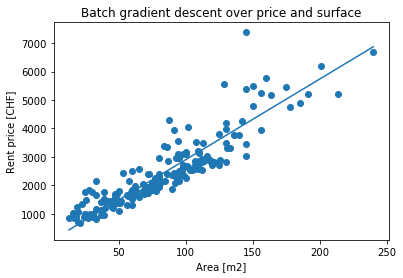

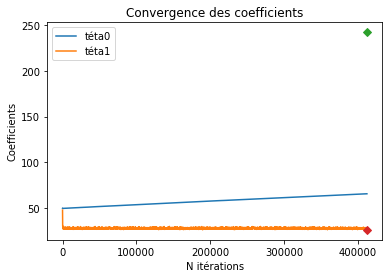

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import inv
import random

dataset = pd.read_excel('lausanne-appart.xlsx',
                        parse_cols=2,
                        header=1,
                        names=['area', 'room', 'rent'])

x = dataset['area']
y = dataset['rent']

teta0 = 50
teta1 = 50

alpha = 0.000001

precision = 0.000000001
delta = precision + 1
old_result = teta0

def h(xn):
    return teta0 + teta1*xn

niter = 0
teta0s = []
teta1s = []
iters = []
#for _ in range(0, 60000):
while delta > precision:

    i = random.randint(0, len(x)-1)
    sum = (h(x[i])-y[i])
        
    teta0 = teta0 - sum*alpha   
    teta1 = teta1 - sum*alpha*x[i]

    delta = np.abs(old_result - teta0)
    old_result = teta0
    niter = niter + 1
    if niter % 10 == 0:
        teta0s.append(teta0)
        teta1s.append(teta1)
        iters.append(niter)

    
print("teta0: ", teta0)
print("teta1: ", teta1)

# Compute final cost
sum = 0
for i in range(0, len(x)):
    sum = sum + ( x[i]*teta1 + teta0 - y[i] )**2
cost = sum / (2*len(x))
print("Final cost: ", cost)

h = np.poly1d([teta1, teta0])
xUnseen = np.linspace(np.min(x), np.max(x))
yHat = h(xUnseen)

plt.scatter(x, y)
plt.plot(xUnseen, yHat)
plt.xlabel('Area [m2]')
plt.ylabel('Rent price [CHF]')
plt.title("Batch gradient descent over price and surface")
plt.show()


plt.plot(iters, teta0s, label="téta0")
plt.plot(iters, teta1s, label="téta1")
plt.plot(iters[-1], 241.99818246, marker="D")
plt.plot(iters[-1], 26.32398249, marker="D")
plt.title("Convergence des coefficients")
plt.xlabel("N itérations")
plt.ylabel("Coefficients")
plt.legend()
plt.show()

a) Done!

b) Nous avons fait un graph qui montre la convergence des coefficient. On peut remarquer que seulement après quelques itérations les coefficents convergent. À noter que téta0 est encore loins de sa valeur calculée dans l'exercice 2.

c) Comme critère d'arrêt, nous avons utilisé le delta de téta0.

d) Le coût final est de **142336.887235** alors qu'il est de **138574.106665** dans l'exercice 2, soit une différence de ~3762. On pourrait diminuer la précision pour faire plus d'itérations.